In [1]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached wrapt-2.0.1-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp310-cp310-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached ml_dtypes-0.5.4-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
  Using cached charset_normalizer-3.4.4-cp310-cp310-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached pillow

In [1]:
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 18.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 16.8 MB/s  0:00:00
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 13.9 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- ----------

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display the shapes of the data
print('Train images shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Test images shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


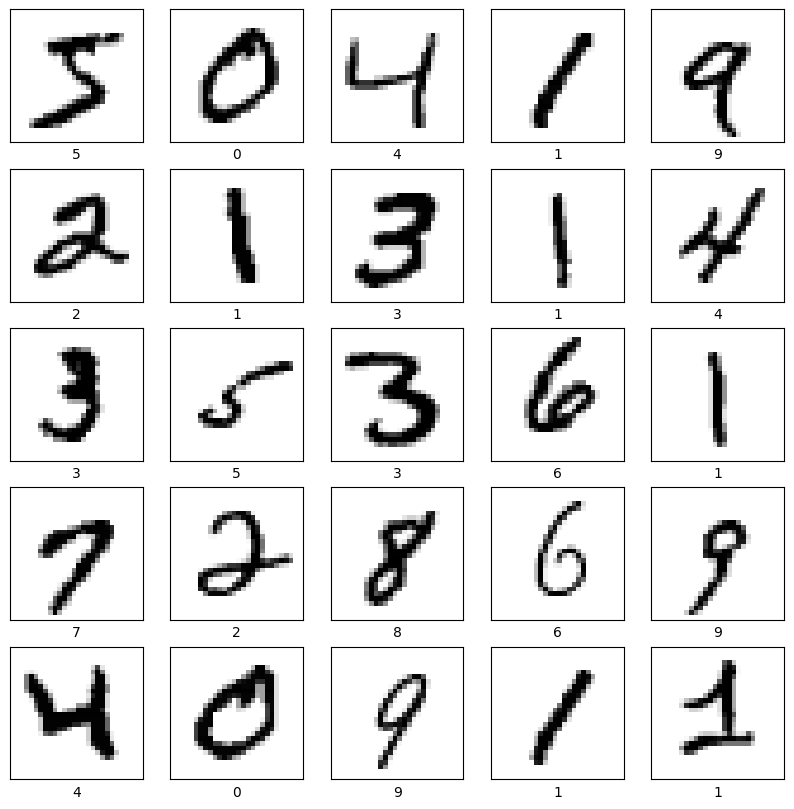

In [3]:
import matplotlib.pyplot as plt

# Assume x_train and y_train are already loaded from tf.keras.datasets.mnist
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display image in grayscale (use 'gray_r' for white background)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.show()

Training set: 60000 images
Test set: 10000 images
Total: 70000 images

Combined dataset: (70000, 28, 28)
Grid dimensions: 265 rows x 265 columns
Grid capacity: 70225 images
Added 225 blank images for padding


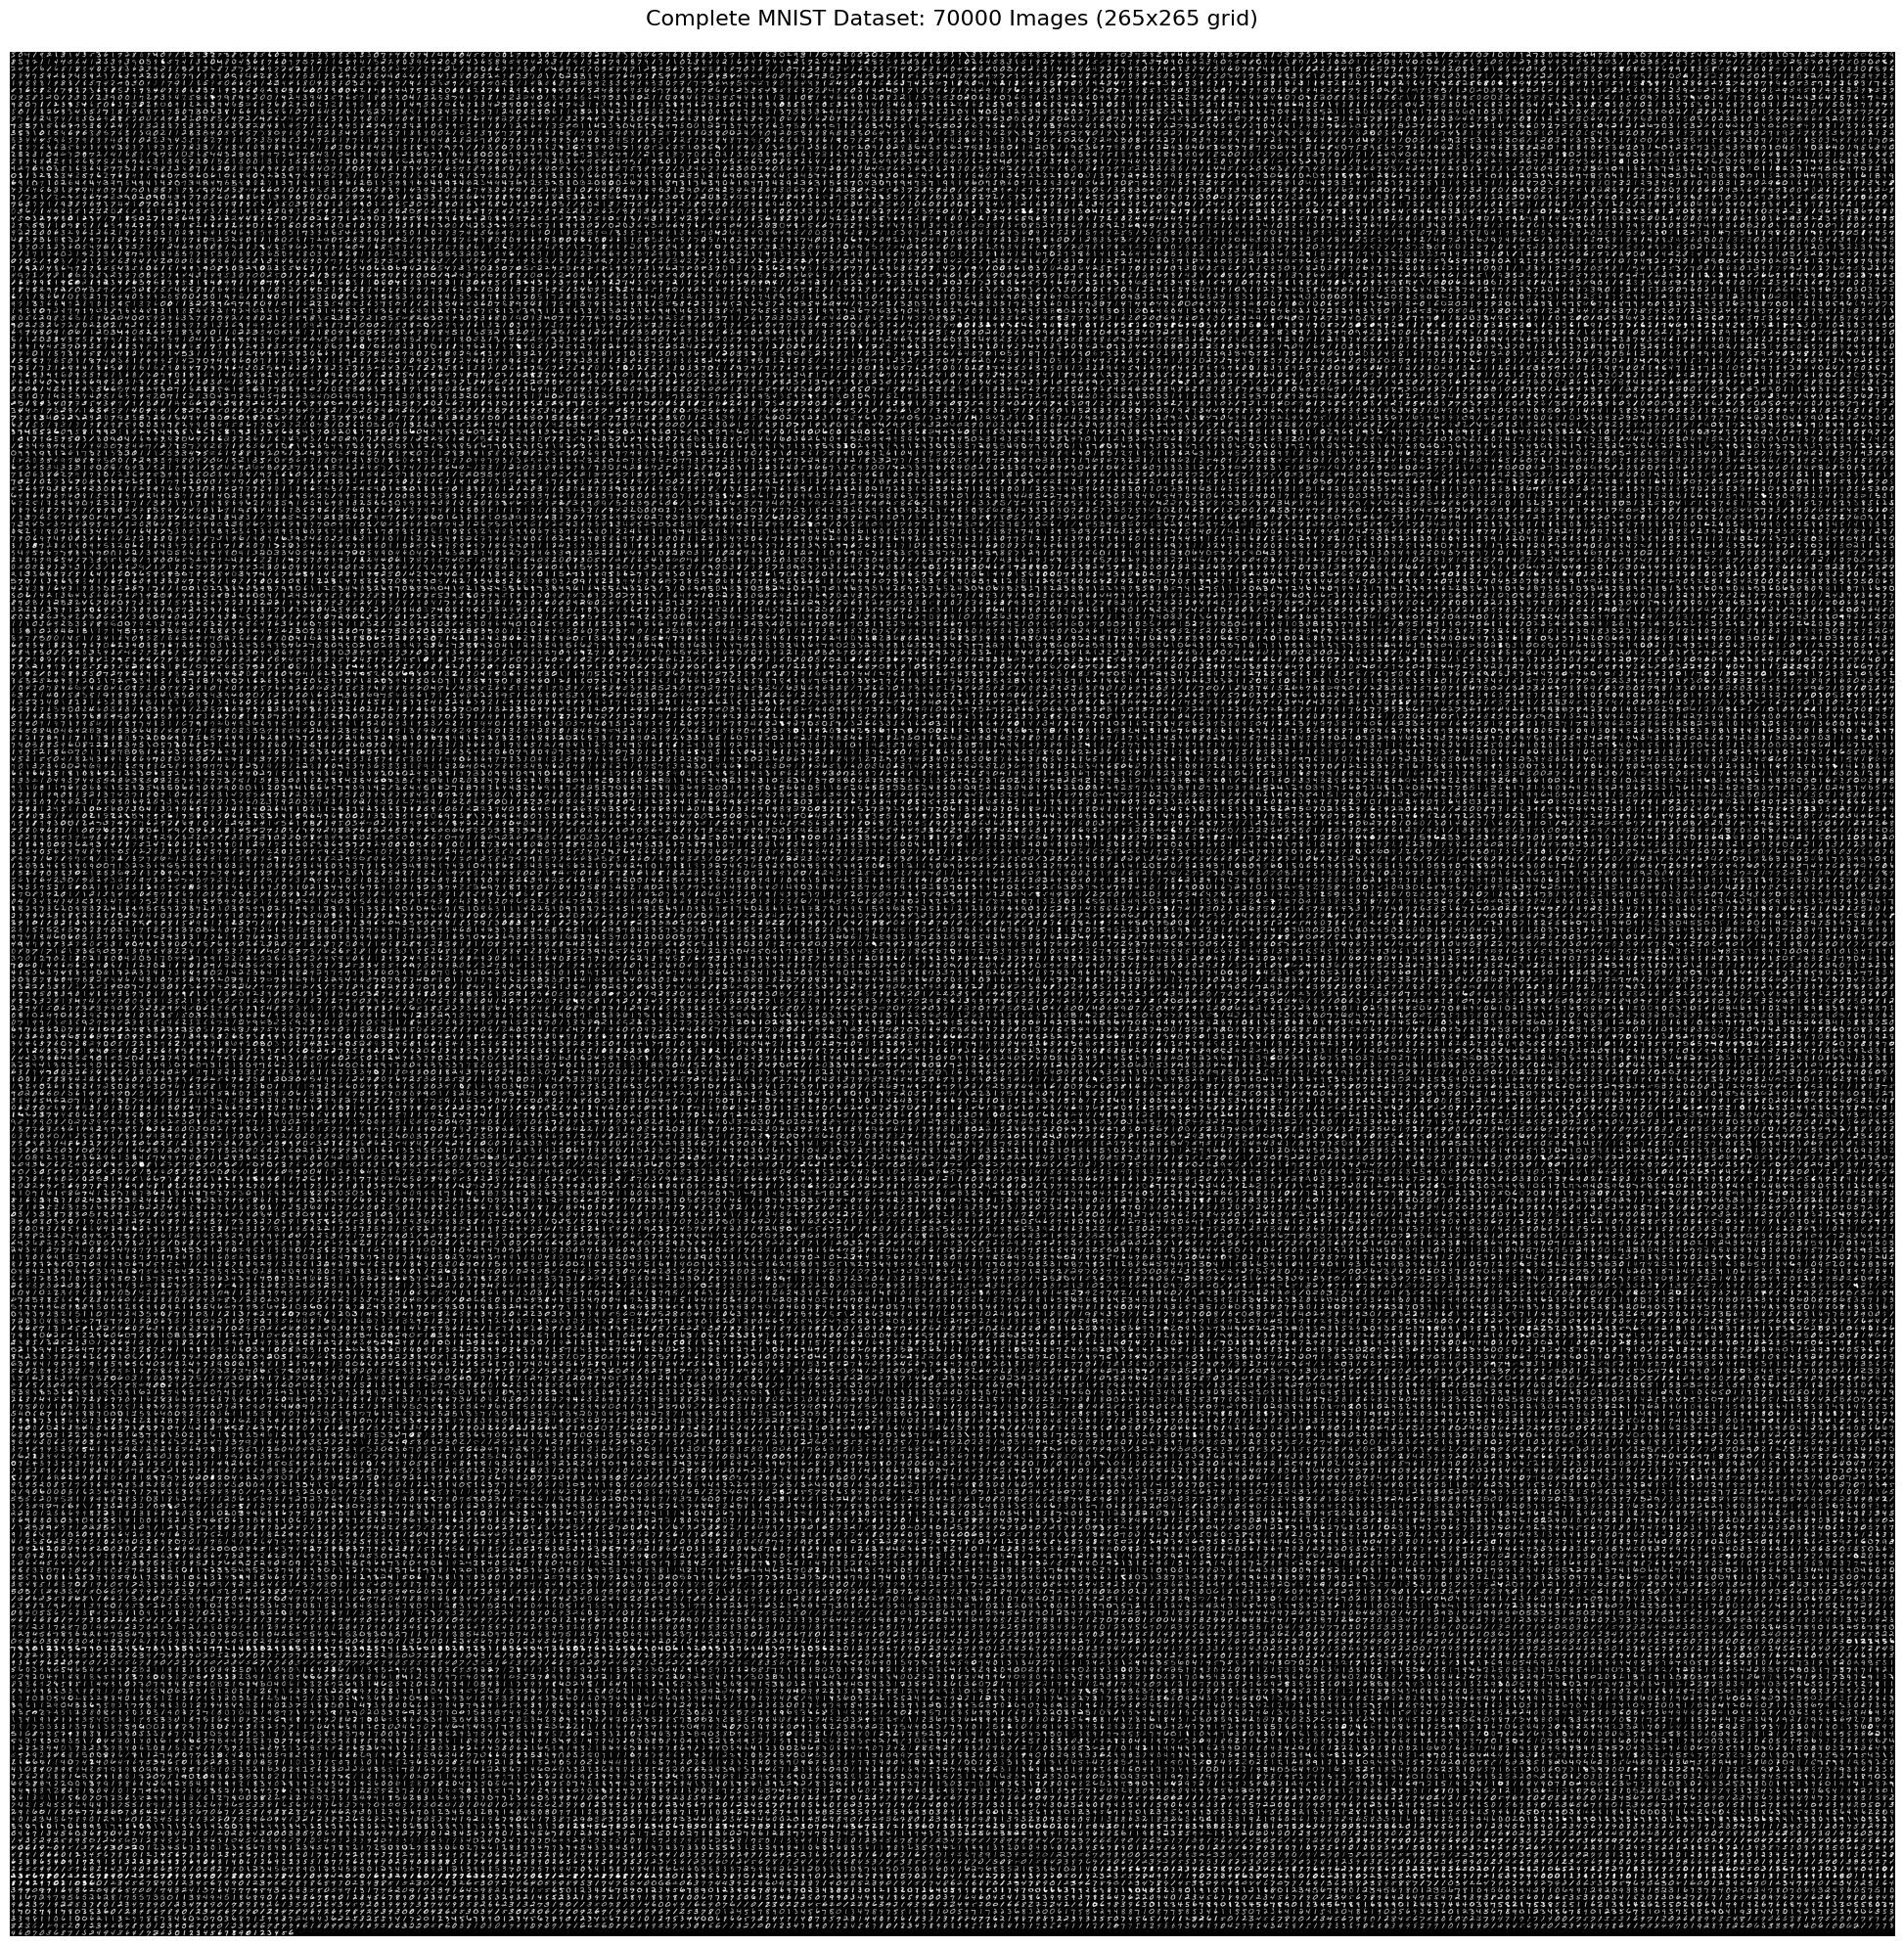

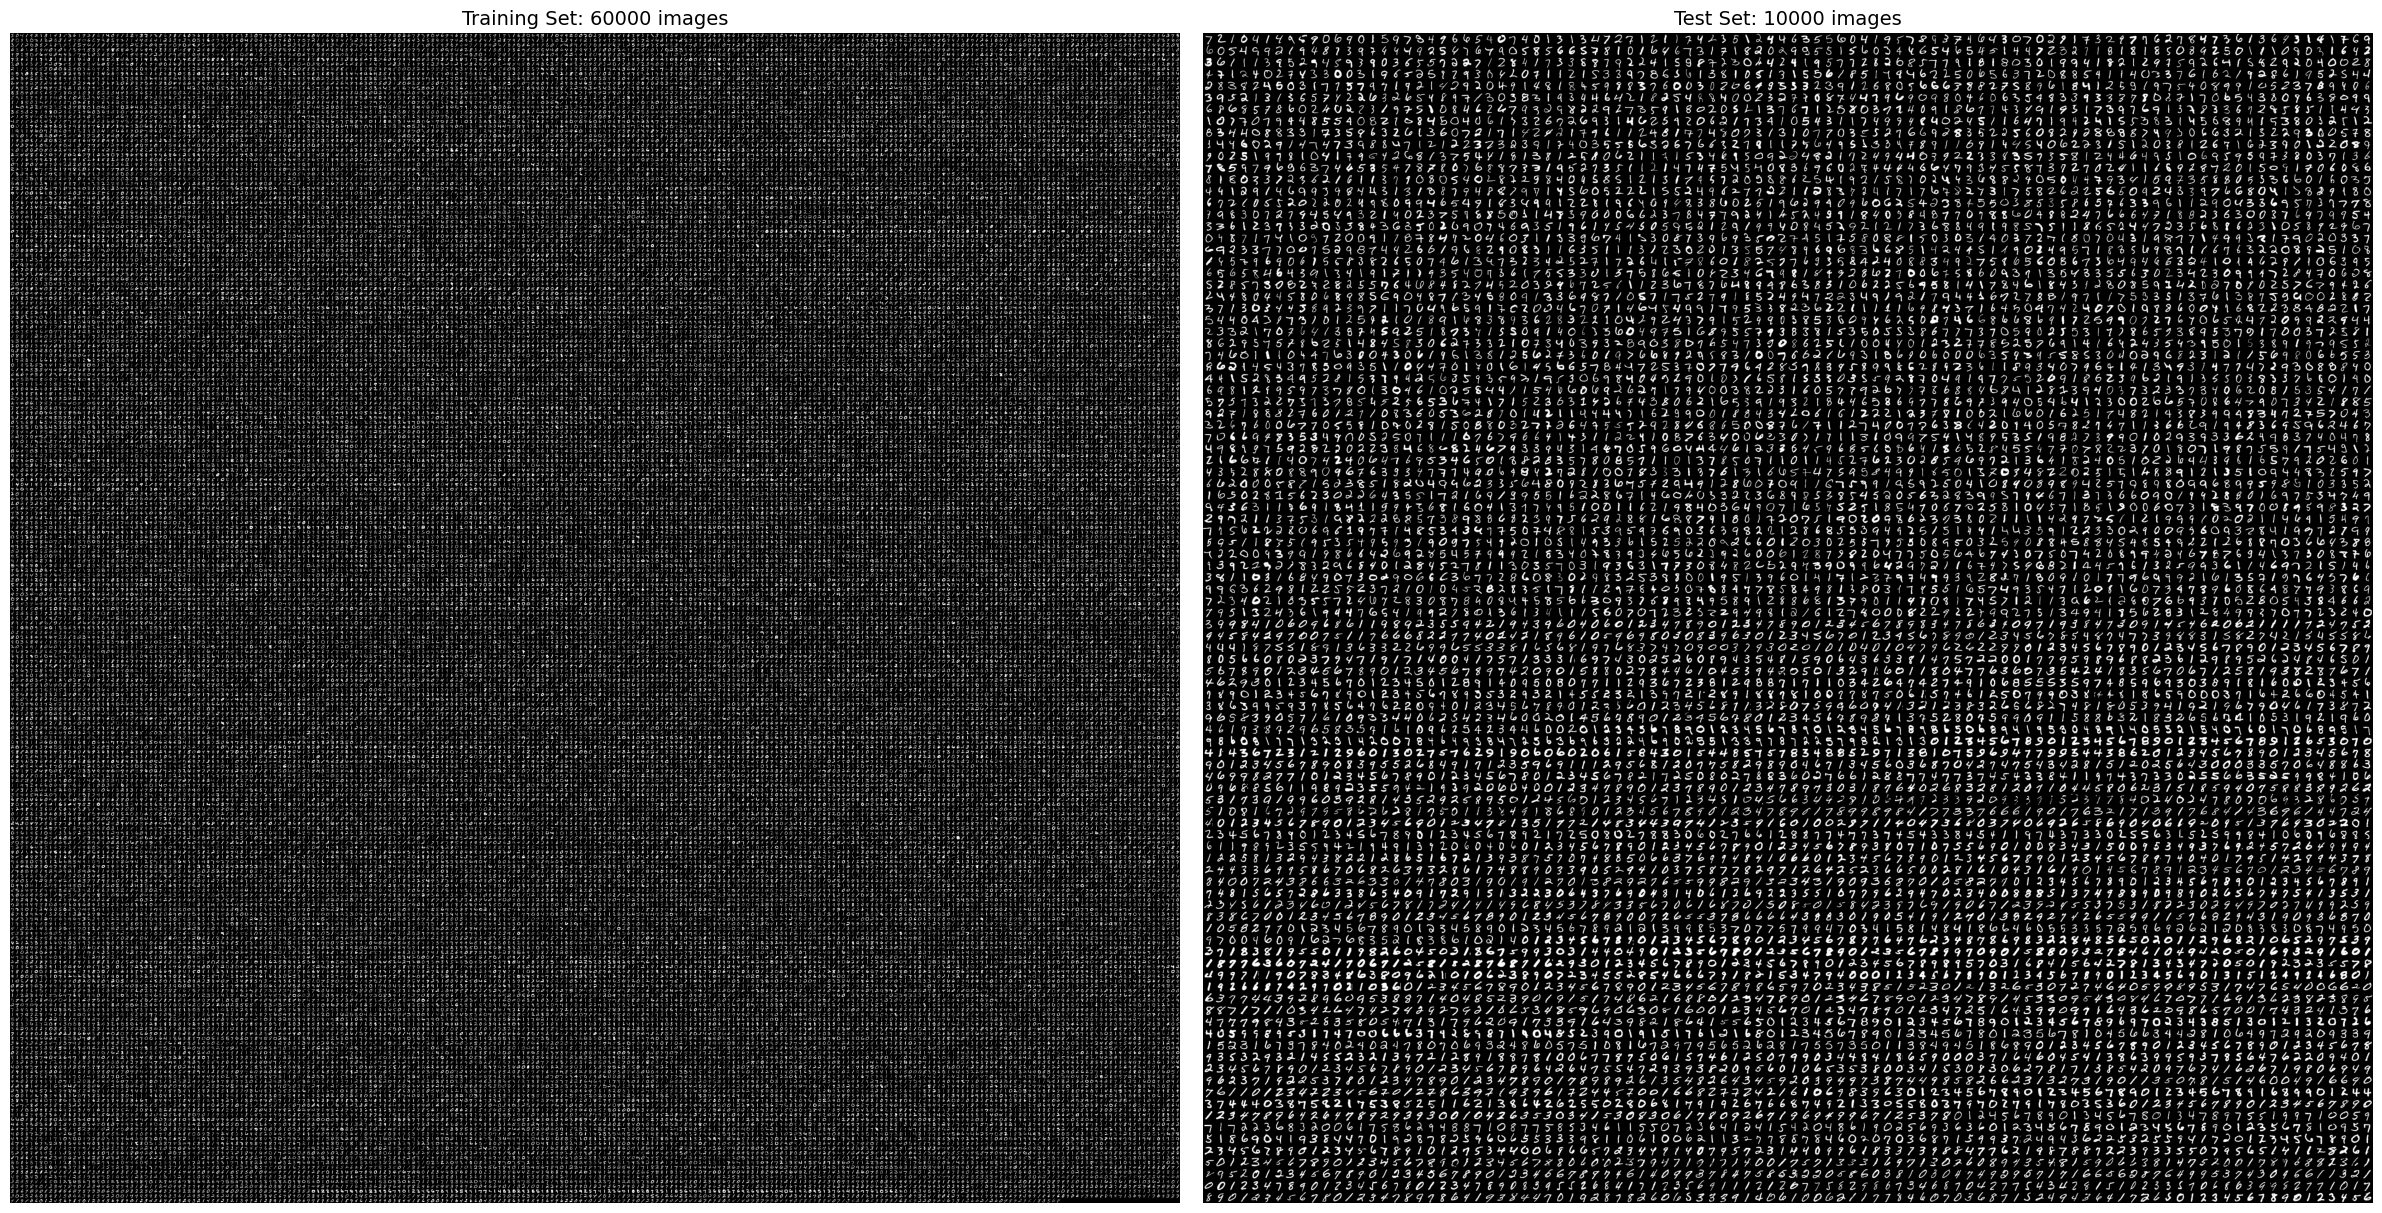


Visualization complete!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load all data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training set: {x_train.shape[0]} images")
print(f"Test set: {x_test.shape[0]} images")
print(f"Total: {x_train.shape[0] + x_test.shape[0]} images")

# Combine training and test sets
all_images = np.concatenate([x_train, x_test], axis=0)
all_labels = np.concatenate([y_train, y_test], axis=0)

print(f"\nCombined dataset: {all_images.shape}")

# Calculate grid dimensions for 70,000 images
# We'll use a rectangular grid that's approximately square
total_images = all_images.shape[0]
n_cols = int(np.ceil(np.sqrt(total_images)))
n_rows = int(np.ceil(total_images / n_cols))

print(f"Grid dimensions: {n_rows} rows x {n_cols} columns")
print(f"Grid capacity: {n_rows * n_cols} images")

# Pad with zeros if needed to fill the grid
padding_needed = n_rows * n_cols - total_images
if padding_needed > 0:
    padding = np.zeros((padding_needed, 28, 28), dtype=all_images.dtype)
    all_images = np.concatenate([all_images, padding], axis=0)
    print(f"Added {padding_needed} blank images for padding")

# Reshape into grid
grid = all_images.reshape(n_rows, n_cols, 28, 28)

# Swap axes to create montage
montage = grid.transpose(0, 2, 1, 3).reshape(n_rows*28, n_cols*28)

# Display the complete montage
plt.figure(figsize=(20, 20))
plt.imshow(montage, cmap='gray')
plt.axis('off')
plt.title(f'Complete MNIST Dataset: {total_images} Images ({n_rows}x{n_cols} grid)', 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Optional: Create separate visualizations for train and test
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Training set montage
n_train_cols = int(np.ceil(np.sqrt(x_train.shape[0])))
n_train_rows = int(np.ceil(x_train.shape[0] / n_train_cols))
padding_train = n_train_rows * n_train_cols - x_train.shape[0]
if padding_train > 0:
    x_train_padded = np.concatenate([x_train, np.zeros((padding_train, 28, 28))], axis=0)
else:
    x_train_padded = x_train

grid_train = x_train_padded.reshape(n_train_rows, n_train_cols, 28, 28)
montage_train = grid_train.transpose(0, 2, 1, 3).reshape(n_train_rows*28, n_train_cols*28)

axes[0].imshow(montage_train, cmap='gray')
axes[0].axis('off')
axes[0].set_title(f'Training Set: {x_train.shape[0]} images', fontsize=14)

# Test set montage
n_test_cols = int(np.ceil(np.sqrt(x_test.shape[0])))
n_test_rows = int(np.ceil(x_test.shape[0] / n_test_cols))
padding_test = n_test_rows * n_test_cols - x_test.shape[0]
if padding_test > 0:
    x_test_padded = np.concatenate([x_test, np.zeros((padding_test, 28, 28))], axis=0)
else:
    x_test_padded = x_test

grid_test = x_test_padded.reshape(n_test_rows, n_test_cols, 28, 28)
montage_test = grid_test.transpose(0, 2, 1, 3).reshape(n_test_rows*28, n_test_cols*28)

axes[1].imshow(montage_test, cmap='gray')
axes[1].axis('off')
axes[1].set_title(f'Test Set: {x_test.shape[0]} images', fontsize=14)

plt.tight_layout()
plt.show()

print("\nVisualization complete!")